# Zadanie 1
Redukcja wymiarowości na zbiorze Diabetes za pomocą LDA
Wykorzystując zbiór danych Diabetes, wykonaj redukcję wymiarowości za pomocą analizy
dyskryminacyjnej (LDA). Kroki:
• Wczytanie danych:
o Załaduj zbiór danych Diabetes.
• Przygotowanie danych:
o Przeprowadź standaryzację cech.
• Redukcja wymiarowości:
o Użyj LDA, aby przekształcić dane do przestrzeni o jednym wymiarze.
• Wizualizacja:
o Przedstaw wyniki na wykresie, pokazując rozkład danych dla dwóch klas

In [14]:
# Biblioteki z których skorzystamy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_diabetes
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
# Wczytanie danych diabetes
data = load_diabetes()
X = data.data
y = data.target
y = (y > np.median(y)).astype(int)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [15]:
# Standaryzacja cech
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [17]:
# Redukcja wymiarów za pomocą LDA
lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X,y)

(array([ 2.,  1.,  2.,  2.,  0.,  3.,  6., 10.,  7.,  5., 12., 16., 11.,
        11., 19., 11., 16.,  5., 16., 15.,  8., 11.,  8., 10.,  3.,  6.,
         1.,  0.,  2.,  2.]),
 array([-1.86839806e+00, -1.69876774e+00, -1.52913742e+00, -1.35950710e+00,
        -1.18987678e+00, -1.02024645e+00, -8.50616134e-01, -6.80985814e-01,
        -5.11355493e-01, -3.41725173e-01, -1.72094852e-01, -2.46453154e-03,
         1.67165789e-01,  3.36796109e-01,  5.06426430e-01,  6.76056751e-01,
         8.45687071e-01,  1.01531739e+00,  1.18494771e+00,  1.35457803e+00,
         1.52420835e+00,  1.69383867e+00,  1.86346899e+00,  2.03309931e+00,
         2.20272964e+00,  2.37235996e+00,  2.54199028e+00,  2.71162060e+00,
         2.88125092e+00,  3.05088124e+00,  3.22051156e+00]),
 <BarContainer object of 30 artists>)

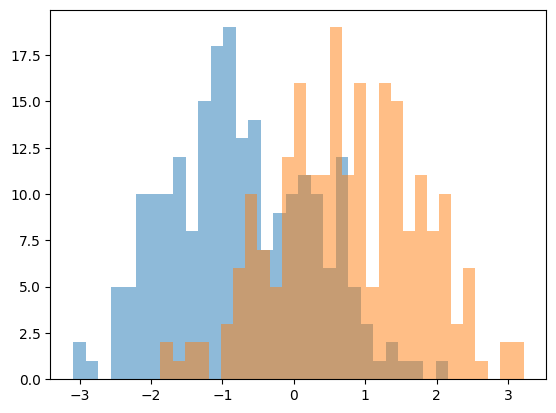

In [18]:
plt.hist(X_lda[y == 0], alpha=0.5, label='Klasa 0', bins=30)
plt.hist(X_lda[y == 1], alpha=0.5, label='Klasa 1', bins=30)